In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('AB Testing Data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount
0,U1,2025-08-02 15:27:54.137058,control,old_page,0,37,Male,Pakistan,3.69,4,Mobile,0.0
1,U2,2024-04-22 10:22:51.712050,treatment,new_page,0,31,Female,UK,1.29,3,Desktop,0.0
2,U3,2024-08-14 21:35:11.135894,treatment,new_page,0,38,Male,US,3.72,5,Desktop,0.0
3,U4,2025-03-19 03:28:51.120807,treatment,new_page,0,28,Female,India,7.76,2,Mobile,0.0
4,U5,2024-12-22 13:13:17.973162,control,old_page,0,33,Male,Australia,6.78,6,Mobile,0.0


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
df.head()

,user_id,timestamp,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount,date,time
0,U1,2025-08-02 15:27:54.137058,control,old_page,0,37,Male,Pakistan,3.69,4,Mobile,0.0,2025-08-02,15:27:54.137058
1,U2,2024-04-22 10:22:51.712050,treatment,new_page,0,31,Female,UK,1.29,3,Desktop,0.0,2024-04-22,10:22:51.712050
2,U3,2024-08-14 21:35:11.135894,treatment,new_page,0,38,Male,US,3.72,5,Desktop,0.0,2024-08-14,21:35:11.135894
3,U4,2025-03-19 03:28:51.120807,treatment,new_page,0,28,Female,India,7.76,2,Mobile,0.0,2025-03-19,03:28:51.120807
4,U5,2024-12-22 13:13:17.973162,control,old_page,0,33,Male,Australia,6.78,6,Mobile,0.0,2024-12-22,13:13:17.973162


In [4]:
df = df.drop('timestamp',axis = 1)
df.head()

,user_id,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount,date,time
0,U1,control,old_page,0,37,Male,Pakistan,3.69,4,Mobile,0.0,2025-08-02,15:27:54.137058
1,U2,treatment,new_page,0,31,Female,UK,1.29,3,Desktop,0.0,2024-04-22,10:22:51.712050
2,U3,treatment,new_page,0,38,Male,US,3.72,5,Desktop,0.0,2024-08-14,21:35:11.135894
3,U4,treatment,new_page,0,28,Female,India,7.76,2,Mobile,0.0,2025-03-19,03:28:51.120807
4,U5,control,old_page,0,33,Male,Australia,6.78,6,Mobile,0.0,2024-12-22,13:13:17.973162


In [5]:
new_col_list = ['user_id','date', 'time', 'group', 'landing_page', 'converted', 'age', 'gender','location', 'session_duration', 'pages_visited', 'device_type','purchase_amount']
df = df[new_col_list]
df.head()

,user_id,date,time,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount
0,U1,2025-08-02,15:27:54.137058,control,old_page,0,37,Male,Pakistan,3.69,4,Mobile,0.0
1,U2,2024-04-22,10:22:51.712050,treatment,new_page,0,31,Female,UK,1.29,3,Desktop,0.0
2,U3,2024-08-14,21:35:11.135894,treatment,new_page,0,38,Male,US,3.72,5,Desktop,0.0
3,U4,2025-03-19,03:28:51.120807,treatment,new_page,0,28,Female,India,7.76,2,Mobile,0.0
4,U5,2024-12-22,13:13:17.973162,control,old_page,0,33,Male,Australia,6.78,6,Mobile,0.0


In [6]:
df.isna().sum()

user_id             0
date                0
time                0
group               0
landing_page        0
converted           0
age                 0
gender              0
location            0
session_duration    0
pages_visited       0
device_type         0
purchase_amount     0
dtype: int64

In [7]:
df['user_id'].drop_duplicates()

0              U1
1              U2
2              U3
3              U4
4              U5
           ...   
294473    U294474
294474    U294475
294475    U294476
294476    U294477
294477    U294478
Name: user_id, Length: 294478, dtype: object

In [8]:
df_controlled = df[df['group']=='control'].reset_index()
df_controlled.head()

,index,user_id,date,time,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount
0,0,U1,2025-08-02,15:27:54.137058,control,old_page,0,37,Male,Pakistan,3.69,4,Mobile,0.0
1,4,U5,2024-12-22,13:13:17.973162,control,old_page,0,33,Male,Australia,6.78,6,Mobile,0.0
2,5,U6,2025-01-02,06:02:32.511149,control,old_page,0,30,Male,US,2.88,1,Desktop,0.0
3,6,U7,2024-01-30,07:31:09.175272,control,old_page,0,32,Male,UK,5.39,3,Desktop,0.0
4,10,U11,2025-02-28,05:47:15.870940,control,old_page,0,38,Male,Canada,4.12,5,Mobile,0.0


In [9]:
df_treated = df[df['group']=='treatment'].reset_index()
df_treated.head()

,index,user_id,date,time,group,landing_page,converted,age,gender,location,session_duration,pages_visited,device_type,purchase_amount
0,1,U2,2024-04-22,10:22:51.712050,treatment,new_page,0,31,Female,UK,1.29,3,Desktop,0.0
1,2,U3,2024-08-14,21:35:11.135894,treatment,new_page,0,38,Male,US,3.72,5,Desktop,0.0
2,3,U4,2025-03-19,03:28:51.120807,treatment,new_page,0,28,Female,India,7.76,2,Mobile,0.0
3,7,U8,2025-05-07,22:29:39.247674,treatment,new_page,0,34,Male,India,5.39,7,Desktop,0.0
4,8,U9,2025-08-22,13:42:17.098595,treatment,new_page,0,48,Female,Pakistan,4.99,3,Mobile,0.0


## EDA

<Axes: ylabel='pages_visited'>

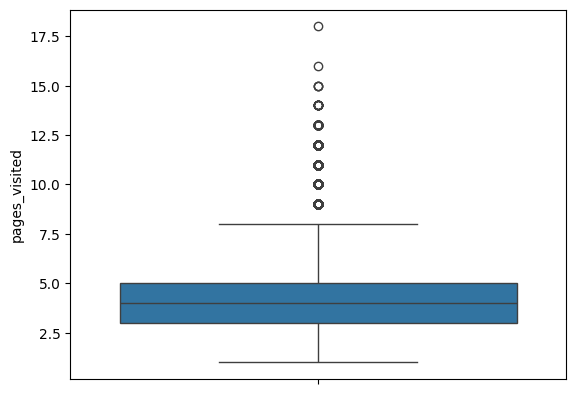

In [10]:
sns.boxplot(df['pages_visited'])

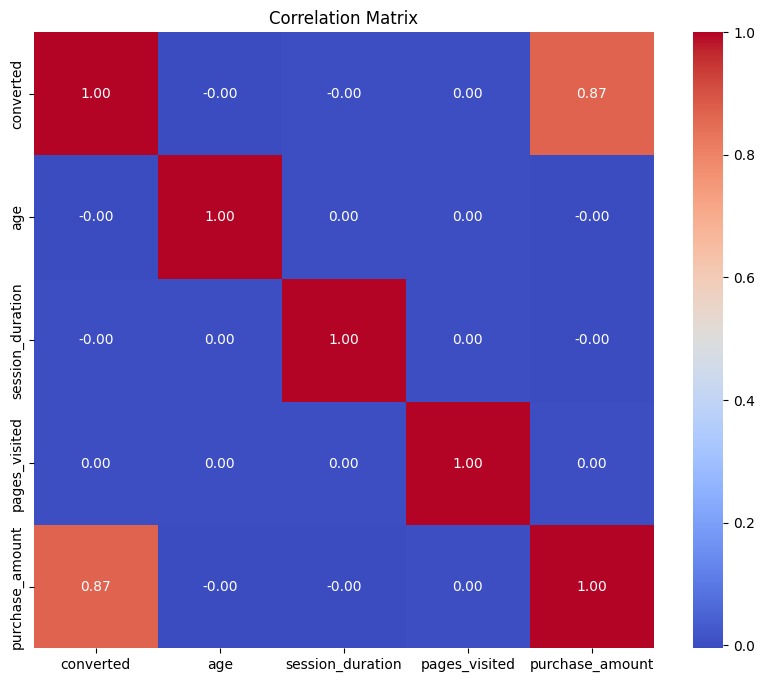

In [11]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From this correlation matrix we can able to see that converted and purchase anount is highly correlated

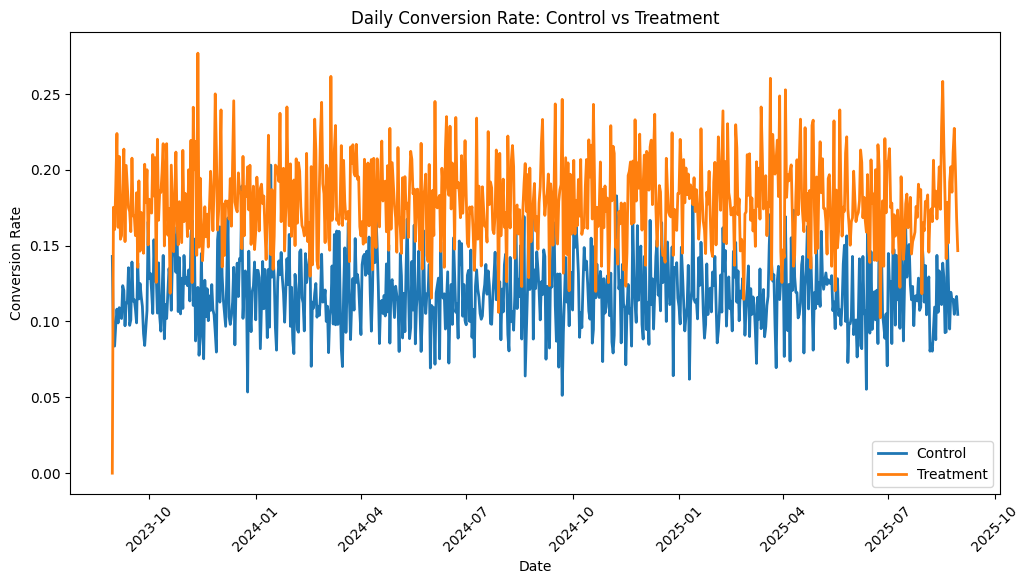

In [12]:
# If date is not datetime yet
df['date'] = pd.to_datetime(df['date'])

# Group by date and group → calculate daily conversion rate
daily_conv = (
    df.groupby(['date', 'group'])['converted']
      .mean()
      .reset_index()
)

# Pivot so that control & treatment become columns
pivot = daily_conv.pivot(index='date', columns='group', values='converted')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(pivot.index, pivot['control'], label='Control', linewidth=2)
plt.plot(pivot.index, pivot['treatment'], label='Treatment', linewidth=2)

# Labels & Title
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.title("Daily Conversion Rate: Control vs Treatment")
plt.legend()

# Rotate dates if needed
plt.xticks(rotation=45)


plt.show()


[Text(0, 0, '144708'), Text(0, 0, '143785'), Text(0, 0, '5985')]

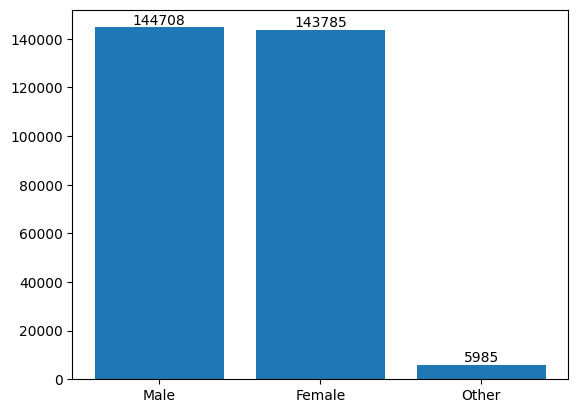

In [13]:
gender_counts = df['gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(gender_counts.index, gender_counts.values)
plt.bar_label(bars)

[Text(0, 0, '72348'), Text(0, 0, '71623'), Text(0, 0, '2955')]

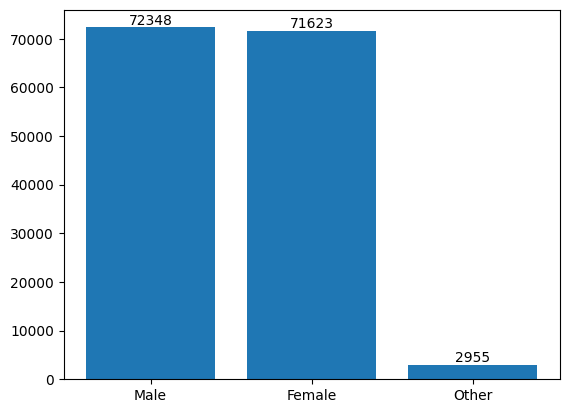

In [14]:
gender_counts_controlled = df_controlled['gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(gender_counts_controlled.index, gender_counts_controlled.values)
plt.bar_label(bars)

[Text(0, 0, '72360'), Text(0, 0, '72162'), Text(0, 0, '3030')]

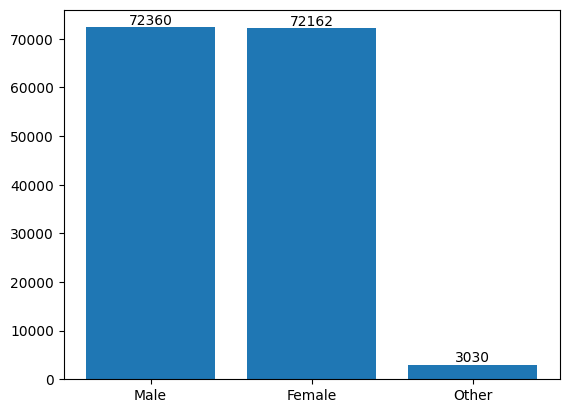

In [15]:
gender_counts_treated = df_treated['gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(gender_counts_treated.index, gender_counts_treated.values)
plt.bar_label(bars)

(array([101622., 102043.,  71218.,  17155.,   2440.]),
 array([18. , 27.4, 36.8, 46.2, 55.6, 65. ]),
 <BarContainer object of 5 artists>)

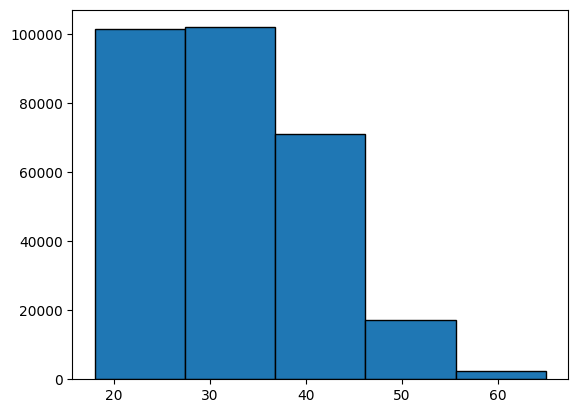

In [16]:
plt.hist(df['age'], bins=5, edgecolor='black')

(array([50921., 50792., 35464.,  8512.,  1237.]),
 array([18. , 27.4, 36.8, 46.2, 55.6, 65. ]),
 <BarContainer object of 5 artists>)

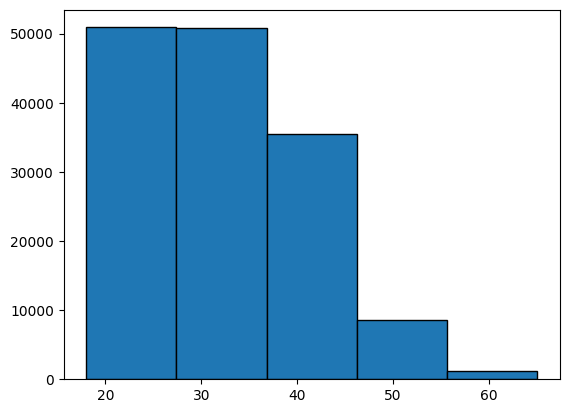

In [17]:
plt.hist(df_controlled['age'], bins=5, edgecolor='black')

(array([50701., 51251., 35754.,  8643.,  1203.]),
 array([18. , 27.4, 36.8, 46.2, 55.6, 65. ]),
 <BarContainer object of 5 artists>)

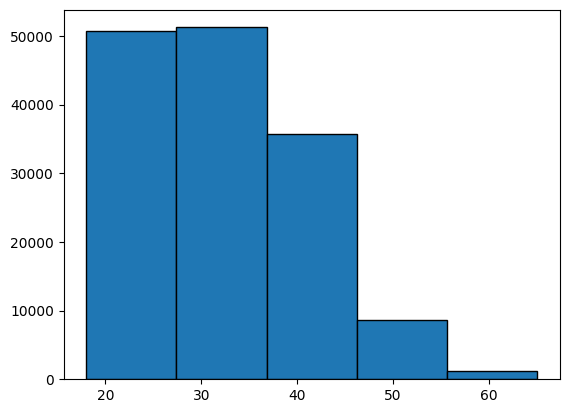

In [18]:
plt.hist(df_treated['age'], bins=5, edgecolor='black')

[Text(0, 0, '88342'),
 Text(0, 0, '59014'),
 Text(0, 0, '44217'),
 Text(0, 0, '29600'),
 Text(0, 0, '29477'),
 Text(0, 0, '29241'),
 Text(0, 0, '14587')]

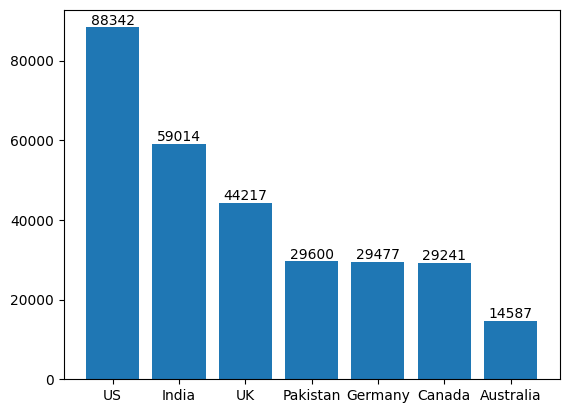

In [19]:
demographic_counts = df['location'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(demographic_counts.index, demographic_counts.values)
plt.bar_label(bars)

[Text(0, 0, '44011'),
 Text(0, 0, '29378'),
 Text(0, 0, '22127'),
 Text(0, 0, '14798'),
 Text(0, 0, '14724'),
 Text(0, 0, '14603'),
 Text(0, 0, '7285')]

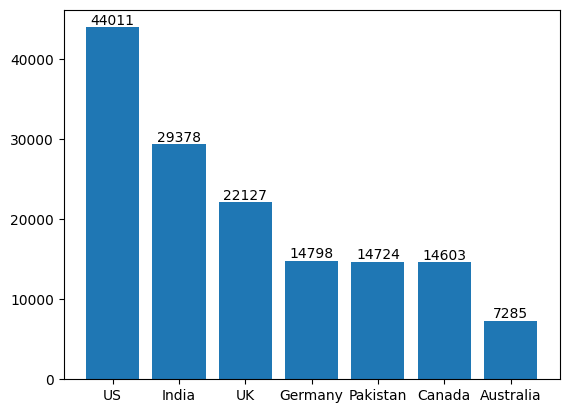

In [20]:
demographic_counts_controlled = df_controlled['location'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(demographic_counts_controlled.index, demographic_counts_controlled.values)
plt.bar_label(bars)

[Text(0, 0, '44331'),
 Text(0, 0, '29636'),
 Text(0, 0, '22090'),
 Text(0, 0, '14876'),
 Text(0, 0, '14679'),
 Text(0, 0, '14638'),
 Text(0, 0, '7302')]

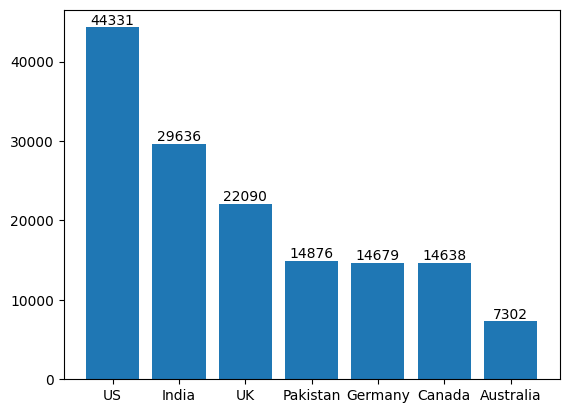

In [21]:
demographic_counts_treated = df_treated['location'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(demographic_counts_treated.index, demographic_counts_treated.values)
plt.bar_label(bars)

[Text(0, 0, '147552'), Text(0, 0, '146926')]

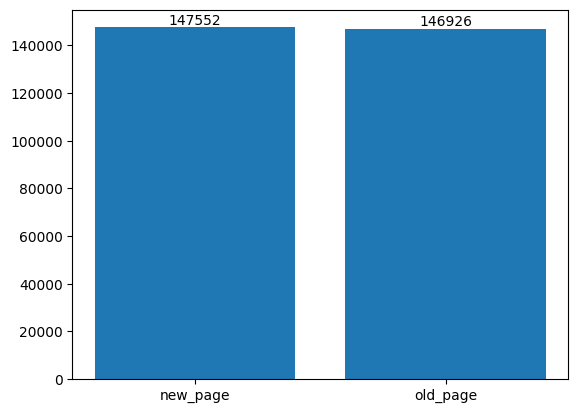

In [22]:
page_counts = df['landing_page'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(page_counts.index, page_counts.values)
plt.bar_label(bars)

[Text(0, 0, '176692'), Text(0, 0, '103093'), Text(0, 0, '14693')]

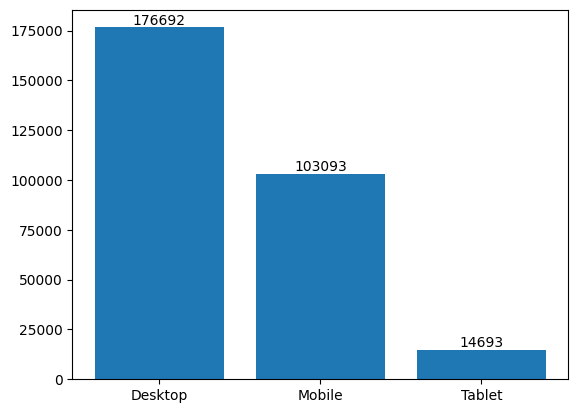

In [23]:
device_type_counts = df['device_type'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(device_type_counts.index, device_type_counts.values)
plt.bar_label(bars)

[Text(0, 0, '88397'), Text(0, 0, '51177'), Text(0, 0, '7352')]

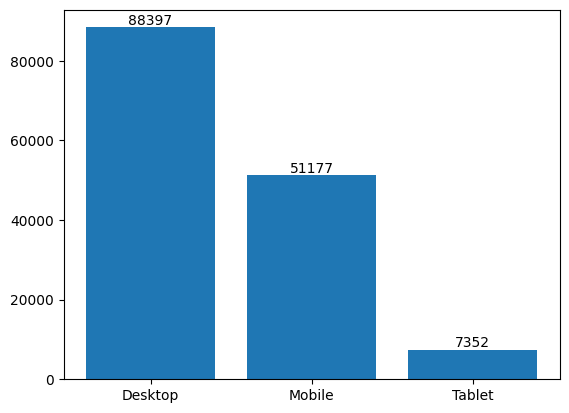

In [24]:
device_type_counts_controlled = df_controlled['device_type'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(device_type_counts_controlled.index, device_type_counts_controlled.values)
plt.bar_label(bars)

[Text(0, 0, '88295'), Text(0, 0, '51916'), Text(0, 0, '7341')]

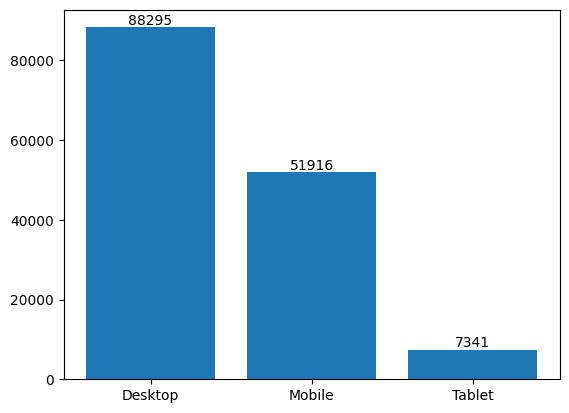

In [25]:
device_type_counts_treated = df_treated['device_type'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(device_type_counts_treated.index, device_type_counts_treated.values)
plt.bar_label(bars)

# Statistical Calculation

In [26]:
control_rate = df_controlled['converted'].mean()
control_rate

np.float64(0.11872643371493133)

In [27]:
treatment_rate = df_treated['converted'].mean()
treatment_rate

np.float64(0.1794892648015615)

In [28]:
absolute_lift = treatment_rate - control_rate
absolute_lift

np.float64(0.060762831086630165)

In [29]:
relative_lift = absolute_lift / control_rate
relative_lift

np.float64(0.5117885645628424)

In [30]:
print(f"Control conversion rate: {control_rate:.4%}")
print(f"Treatment conversion rate: {treatment_rate:.4%}")
print(f"Absolute lift: {absolute_lift:.4%}")
print(f"Relative lift: {relative_lift:.2%}")


Control conversion rate: 11.8726%
Treatment conversion rate: 17.9489%
Absolute lift: 6.0763%
Relative lift: 51.18%


The **control group** has a conversion rate of **11.87%**, while the **treatment group** has a conversion rate of **17.95%**.
This results in an **absolute lift** of approximately **6.08** percentage points, indicating that the new landing page leads to a substantially higher conversion rate compared to the old page.
From a business perspective, this is a large and meaningful improvement, suggesting that the change in page format positively impacts user conversions.

In [31]:
from statsmodels.stats.proportion import proportions_ztest

# Aggregate numbers
control_conversions = df_controlled['converted'].sum()
control_total = df_controlled.shape[0]

treatment_conversions = df_treated['converted'].sum()
treatment_total = df_treated.shape[0]

# Prepare inputs
conversions = np.array([control_conversions, treatment_conversions])
samples = np.array([control_total, treatment_total])

# Two-sided z-test
z_stat, p_value = proportions_ztest(
    count=conversions,
    nobs=samples,
    alternative='two-sided'
)

z_stat, p_value


(np.float64(-46.277339891305736), np.float64(0.0))

The statistical test results show a p-value effectively equal to zero, indicating that the difference in conversion rates between the control and treatment groups is extremely unlikely to be due to random chance.
We therefore reject the null hypothesis and conclude that the new landing page has a statistically significant impact on conversion rate.

In [32]:
from statsmodels.stats.proportion import confint_proportions_2indep

ci_low, ci_high = confint_proportions_2indep(
    count1=treatment_conversions,
    nobs1=treatment_total,
    count2=control_conversions,
    nobs2=control_total,
    method='wald'
)

ci_low, ci_high


(np.float64(0.05819966678070663), np.float64(0.06332599539255371))

The 95% confidence interval for the absolute difference in conversion rates between the treatment and control groups ranges from approximately 5.8% to 6.3%.
Since the entire interval lies well above zero, this provides strong evidence that the new landing page increases conversion rate.
Moreover, even the lower bound of the interval represents a large and practically meaningful improvement, reinforcing the business value of rolling out the new page.

# Conclusion

The treatment group achieved a conversion rate of 17.95% compared to 11.87% in the control group, resulting in an absolute lift of approximately 6.1 percentage points. This difference is statistically significant (p < 0.001), and the 95% confidence interval for the lift ranges from 5.8% to 6.3%. Given both the statistical and practical significance of the result, we recommend rolling out the new landing page to all users.